# Import package

In [414]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import unary_union
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
from sklearn.decomposition import PCA
from sklearn import decomposition
from scipy.stats import zscore


from sklearn.preprocessing import RobustScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection
import numpy as np

import os

# Read file

In [415]:
database_2011 = pd.read_csv("data/step4_conbination_census2011_after_reaggragated_LSOA2011_to_2021.csv")
database_2021 = pd.read_csv("data/step3_census_included_permmiting.csv")

In [416]:
print("2011:", len(database_2011))
print("2021:", len(database_2021))

2011: 4994
2021: 4994


In [417]:
database_2011 = database_2011.loc[:, ~ database_2011.columns.str.contains("^Unnamed")]
database_2011.head()

,LSOA21CD,All_usual_residents_2011,aged_0_to_19_2011,Age_20_to_24_2011,aged_25_to_44_2011,aged_45_to_64_2011,aged_65_and_more_2011,Ethnic_group_White_2011,Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2011,Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2011,...,Income_Score_rate_2015,Income_Rank_2015,Income_Score_rate_2019,Income_Rank_2019,Income_Rank_2015_London,Income_Rank_2019_London,mediam_price_2011,mediam_price_2021,compared_mean_price_2011,compared_mean_price_2021
0,E01034473,1154.286950,301.577788,133.718453,567.388937,117.460890,34.140882,330.028522,489.759076,235.734659,...,0.197,8548.0,0.169,8902.0,1698.0,1558.0,151475.0,200000,-14433.0,-73762
1,E01034474,1686.851157,440.719563,195.413391,829.170498,171.654924,49.892781,482.296880,715.723818,344.497771,...,0.197,8548.0,0.169,8902.0,1698.0,1558.0,151475.0,200000,-14433.0,-73762
2,E01034471,865.329843,208.550718,65.366643,346.287572,158.747561,86.377349,479.355381,183.649139,147.853121,...,0.297,3447.0,0.228,5088.0,480.0,663.0,179995.0,330000,14087.0,56238
3,E01034472,246.800445,59.480683,18.643199,98.764567,45.276341,24.635656,136.716793,52.378512,42.169141,...,0.297,3447.0,0.228,5088.0,480.0,663.0,179995.0,330000,14087.0,56238
4,E01034475,538.080816,176.677246,37.830663,184.726324,91.357027,47.489556,223.160668,113.894443,159.774184,...,0.227,6683.0,0.215,5804.0,1253.0,827.0,175000.0,360000,9092.0,86238


In [418]:
has_null = database_2011.isnull().any().any()

if has_null:
    print("The DataFrame has missing values.")
else:
    print("The DataFrame does not have any missing values.")

The DataFrame does not have any missing values.


In [419]:
database_2021 = database_2021.loc[:, ~ database_2021.columns.str.contains("^Unnamed")]
database_2021.head()

,LSOA21CD,geography_2021,geography_code_2021,aged_0_to_19_2021,aged_20_to_24_2021,aged_25_to_44_2021,aged_45_to_64_2021,aged_65_and_more_2021,All_usual_residents_2021,Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021,...,Student_2021,average_household_size_2021,population_density_2021,average_number_of_bedrooms_per_household_2021,average_number_of_rooms_per_household_2021,all_households_2021,occupancy_rating_bedrooms_of_-1_or_less_2021,the_number_of_conversion2011_to_2018,the_number_of_newbuild2011_to_2018,the_number_of_change_of_use2011_to_2018
0,E01000001,City of London 001A,E01000001,141,90,522,350,370,1473,158,...,154,0.006265,0.011027,209.50,93.000000,837,26,6.0,0.0,3.0
1,E01000002,City of London 001B,E01000002,110,100,502,395,277,1384,181,...,141,0.003651,0.006133,206.50,91.444444,823,23,0.0,17.0,8.0
2,E01000003,City of London 001C,E01000003,127,96,608,497,285,1613,153,...,138,0.017717,0.028156,254.25,113.000000,1017,50,0.0,0.0,7.0
3,E01000005,City of London 001E,E01000005,221,118,364,294,104,1101,354,...,252,0.002514,0.005774,119.50,53.444444,481,75,4.0,0.0,7.0
4,E01000006,Barking and Dagenham 016A,E01000006,512,124,619,429,158,1842,885,...,416,0.003856,0.012795,138.50,61.555556,554,134,0.0,3.0,0.0


In [420]:
database_2021 = database_2021.fillna(0)

In [421]:
has_null = database_2021.isnull().any().any()

if has_null:
    print("The DataFrame has missing values.")
else:
    print("The DataFrame does not have any missing values.")

The DataFrame does not have any missing values.


In [422]:
rank_columns = [col for col in database_2011.columns if 'rank' in col.lower()]

for col in rank_columns:
    print(col)

Income_Rank_2015
Income_Rank_2019
Income_Rank_2015_London
Income_Rank_2019_London


In [423]:
database = database_2021.merge(database_2011,on = "LSOA21CD", how = "inner")
len(database)

4994

In [424]:
database_2011

,LSOA21CD,All_usual_residents_2011,aged_0_to_19_2011,Age_20_to_24_2011,aged_25_to_44_2011,aged_45_to_64_2011,aged_65_and_more_2011,Ethnic_group_White_2011,Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2011,Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2011,...,Income_Score_rate_2015,Income_Rank_2015,Income_Score_rate_2019,Income_Rank_2019,Income_Rank_2015_London,Income_Rank_2019_London,mediam_price_2011,mediam_price_2021,compared_mean_price_2011,compared_mean_price_2021
0,E01034473,1154.286950,301.577788,133.718453,567.388937,117.460890,34.140882,330.028522,489.759076,235.734659,...,0.197,8548.0,0.169,8902.0,1698.0,1558.0,151475.0,200000,-14433.0,-73762
1,E01034474,1686.851157,440.719563,195.413391,829.170498,171.654924,49.892781,482.296880,715.723818,344.497771,...,0.197,8548.0,0.169,8902.0,1698.0,1558.0,151475.0,200000,-14433.0,-73762
2,E01034471,865.329843,208.550718,65.366643,346.287572,158.747561,86.377349,479.355381,183.649139,147.853121,...,0.297,3447.0,0.228,5088.0,480.0,663.0,179995.0,330000,14087.0,56238
3,E01034472,246.800445,59.480683,18.643199,98.764567,45.276341,24.635656,136.716793,52.378512,42.169141,...,0.297,3447.0,0.228,5088.0,480.0,663.0,179995.0,330000,14087.0,56238
4,E01034475,538.080816,176.677246,37.830663,184.726324,91.357027,47.489556,223.160668,113.894443,159.774184,...,0.227,6683.0,0.215,5804.0,1253.0,827.0,175000.0,360000,9092.0,86238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01033742,1352.000000,295.000000,113.000000,728.000000,179.000000,37.000000,618.000000,186.000000,423.000000,...,0.118,15882.0,0.078,19844.0,3119.0,3587.0,190000.0,275000,24092.0,1238
4990,E01033743,2038.000000,817.000000,101.000000,791.000000,254.000000,75.000000,593.000000,144.000000,1154.000000,...,0.204,8069.0,0.133,12244.0,1589.0,2269.0,183998.0,312500,18090.0,38738
4991,E01033744,1845.000000,534.000000,123.000000,705.000000,311.000000,172.000000,881.000000,235.000000,613.000000,...,0.213,7499.0,0.184,7767.0,1450.0,1308.0,158750.0,335500,-7158.0,61738
4992,E01033745,1820.000000,705.000000,95.000000,651.000000,310.000000,59.000000,748.000000,112.000000,837.000000,...,0.203,8161.0,0.154,10101.0,1611.0,1812.0,204000.0,325000,38092.0,51238


In [425]:
database_2011_select_for_PCA = database_2011[["LSOA21CD", "R1_Higher_managerial_administrative_and_professional_occupations_2011",\
                                              "Highest_level_of_qualification_Level_4_qualifications_and_above_2011",\
                                              "Income_Rank_2015_London", \
                                              "Income_Rank_2019_London", \
                                              "mediam_price_2021",\
                                              "mediam_price_2011",\
                                              "compared_mean_price_2011",\
                                              "compared_mean_price_2021","Ethnic_group_White_2011","All_usual_residents_2011"]]
len(database_2011_select_for_PCA)

4994

In [426]:
database_2021_select_for_PCA = database_2021[["LSOA21CD","R1_Higher_managerial_administrative_and_professional_occupations_2021","Ethnic_group_White_2021",
                                              "Highest_level_of_qualification_Level_4_qualifications_and_above_2021","All_usual_residents_2021"]]
len(database_2021_select_for_PCA)

4994

In [427]:
orginal_database_for_PCA = database_2011_select_for_PCA.merge(database_2021_select_for_PCA, on = "LSOA21CD", how = "inner")
len(orginal_database_for_PCA)

4994

In [428]:
fillnan_database_for_PCA = orginal_database_for_PCA.fillna(0)

In [429]:
len(fillnan_database_for_PCA)

4994

In [430]:
# Sort the columns by name
sored_orginal_database_for_PCA = fillnan_database_for_PCA.copy()
sorted_columns = sorted(sored_orginal_database_for_PCA.columns)

# Reorder the DataFrame
sored_orginal_database_for_PCA = sored_orginal_database_for_PCA[sorted_columns]
sored_orginal_database_for_PCA.head()

,All_usual_residents_2011,All_usual_residents_2021,Ethnic_group_White_2011,Ethnic_group_White_2021,Highest_level_of_qualification_Level_4_qualifications_and_above_2011,Highest_level_of_qualification_Level_4_qualifications_and_above_2021,Income_Rank_2015_London,Income_Rank_2019_London,LSOA21CD,R1_Higher_managerial_administrative_and_professional_occupations_2011,R1_Higher_managerial_administrative_and_professional_occupations_2021,compared_mean_price_2011,compared_mean_price_2021,mediam_price_2011,mediam_price_2021
0,1154.286950,1267,330.028522,355,399.123164,395,1698.0,1558.0,E01034473,108.519231,108,-14433.0,-73762,151475.0,200000
1,1686.851157,2250,482.296880,609,583.270365,870,1698.0,1558.0,E01034474,158.587767,285,-14433.0,-73762,151475.0,200000
2,865.329843,2679,479.355381,1012,196.878103,698,480.0,663.0,E01034471,46.690459,127,14087.0,56238,179995.0,330000
3,246.800445,1886,136.716793,624,56.151540,580,480.0,663.0,E01034472,13.316571,110,14087.0,56238,179995.0,330000
4,538.080816,1825,223.160668,694,104.839232,405,1253.0,827.0,E01034475,20.525147,71,9092.0,86238,175000.0,360000


In [431]:
pop_variables_2011 = ["R1_Higher_managerial_administrative_and_professional_occupations_2011","Highest_level_of_qualification_Level_4_qualifications_and_above_2011", "Ethnic_group_White_2011"]
pop_variables_2021 = ["R1_Higher_managerial_administrative_and_professional_occupations_2021","Highest_level_of_qualification_Level_4_qualifications_and_above_2021","Ethnic_group_White_2021"]


In [432]:

for column in pop_variables_2011:
    new_column_name = column + '_pct'
    denominator = sored_orginal_database_for_PCA['All_usual_residents_2011']
    
    sored_orginal_database_for_PCA[new_column_name] = (sored_orginal_database_for_PCA[column] / denominator * 100).round(2)


In [433]:

for column in pop_variables_2021:
    new_column_name = column + '_pct'
    denominator = sored_orginal_database_for_PCA['All_usual_residents_2021']
    
    sored_orginal_database_for_PCA[new_column_name] = (sored_orginal_database_for_PCA[column] / denominator * 100).round(2)

In [434]:
sored_orginal_database_for_PCA

,All_usual_residents_2011,All_usual_residents_2021,Ethnic_group_White_2011,Ethnic_group_White_2021,Highest_level_of_qualification_Level_4_qualifications_and_above_2011,Highest_level_of_qualification_Level_4_qualifications_and_above_2021,Income_Rank_2015_London,Income_Rank_2019_London,LSOA21CD,R1_Higher_managerial_administrative_and_professional_occupations_2011,...,compared_mean_price_2011,compared_mean_price_2021,mediam_price_2011,mediam_price_2021,R1_Higher_managerial_administrative_and_professional_occupations_2011_pct,Highest_level_of_qualification_Level_4_qualifications_and_above_2011_pct,Ethnic_group_White_2011_pct,R1_Higher_managerial_administrative_and_professional_occupations_2021_pct,Highest_level_of_qualification_Level_4_qualifications_and_above_2021_pct,Ethnic_group_White_2021_pct
0,1154.286950,1267,330.028522,355,399.123164,395,1698.0,1558.0,E01034473,108.519231,...,-14433.0,-73762,151475.0,200000,9.40,34.58,28.59,8.52,31.18,28.02
1,1686.851157,2250,482.296880,609,583.270365,870,1698.0,1558.0,E01034474,158.587767,...,-14433.0,-73762,151475.0,200000,9.40,34.58,28.59,12.67,38.67,27.07
2,865.329843,2679,479.355381,1012,196.878103,698,480.0,663.0,E01034471,46.690459,...,14087.0,56238,179995.0,330000,5.40,22.75,55.40,4.74,26.05,37.78
3,246.800445,1886,136.716793,624,56.151540,580,480.0,663.0,E01034472,13.316571,...,14087.0,56238,179995.0,330000,5.40,22.75,55.40,5.83,30.75,33.09
4,538.080816,1825,223.160668,694,104.839232,405,1253.0,827.0,E01034475,20.525147,...,9092.0,86238,175000.0,360000,3.81,19.48,41.47,3.89,22.19,38.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,1352.000000,1340,618.000000,655,532.000000,601,3119.0,3587.0,E01033742,180.000000,...,24092.0,1238,190000.0,275000,13.31,39.35,45.71,15.52,44.85,48.88
4990,2038.000000,1941,593.000000,597,533.000000,623,1589.0,2269.0,E01033743,120.000000,...,18090.0,38738,183998.0,312500,5.89,26.15,29.10,6.70,32.10,30.76
4991,1845.000000,1806,881.000000,797,404.000000,528,1450.0,1308.0,E01033744,95.000000,...,-7158.0,61738,158750.0,335500,5.15,21.90,47.75,7.20,29.24,44.13
4992,1820.000000,1784,748.000000,588,463.000000,548,1611.0,1812.0,E01033745,103.000000,...,38092.0,51238,204000.0,325000,5.66,25.44,41.10,6.73,30.72,32.96


In [435]:
sored_orginal_database_for_PCA["R1_Higher_managerial_administrative_and_professional_occupations_change_pct"] = sored_orginal_database_for_PCA["R1_Higher_managerial_administrative_and_professional_occupations_2021_pct"] - sored_orginal_database_for_PCA["R1_Higher_managerial_administrative_and_professional_occupations_2011_pct"]
sored_orginal_database_for_PCA["Highest_level_of_qualification_Level_4_qualifications_and_above_change_pct"] = sored_orginal_database_for_PCA["Highest_level_of_qualification_Level_4_qualifications_and_above_2021_pct"] - sored_orginal_database_for_PCA["Highest_level_of_qualification_Level_4_qualifications_and_above_2011_pct"]
sored_orginal_database_for_PCA["Ethnic_group_White_change_pct"] = sored_orginal_database_for_PCA["Ethnic_group_White_2021_pct"] - sored_orginal_database_for_PCA["Ethnic_group_White_2011_pct"]
sored_orginal_database_for_PCA["Income_Rank_change_pct"] = (sored_orginal_database_for_PCA["Income_Rank_2019_London"] - sored_orginal_database_for_PCA["Income_Rank_2015_London"])
# sored_orginal_database_for_PCA['Income_Rank_change_pct_z'] = zscore(sored_orginal_database_for_PCA['Income_Rank_change_pct'])
sored_orginal_database_for_PCA["compared_housing_change"] = sored_orginal_database_for_PCA["compared_mean_price_2021"] - sored_orginal_database_for_PCA["compared_mean_price_2011"]

In [436]:
sored_orginal_database_for_PCA = sored_orginal_database_for_PCA.fillna(0)


# Data Description

In [437]:
sored_orginal_database_for_PCA_selected = sored_orginal_database_for_PCA[["LSOA21CD","R1_Higher_managerial_administrative_and_professional_occupations_change_pct", "Highest_level_of_qualification_Level_4_qualifications_and_above_change_pct",\
                                                                        "Income_Rank_change_pct", "compared_housing_change","Ethnic_group_White_change_pct"]].copy()

In [438]:
sored_orginal_database_for_PCA_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4993
Data columns (total 6 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   LSOA21CD                                                                     4994 non-null   object 
 1   R1_Higher_managerial_administrative_and_professional_occupations_change_pct  4994 non-null   float64
 2   Highest_level_of_qualification_Level_4_qualifications_and_above_change_pct   4994 non-null   float64
 3   Income_Rank_change_pct                                                       4994 non-null   float64
 4   compared_housing_change                                                      4994 non-null   float64
 5   Ethnic_group_White_change_pct                                                4994 non-null   float64
dtypes: float64(5), object(1)
memory usage: 27

In [439]:
print(sored_orginal_database_for_PCA_selected.dtypes)

LSOA21CD                                                                        object
R1_Higher_managerial_administrative_and_professional_occupations_change_pct    float64
Highest_level_of_qualification_Level_4_qualifications_and_above_change_pct     float64
Income_Rank_change_pct                                                         float64
compared_housing_change                                                        float64
Ethnic_group_White_change_pct                                                  float64
dtype: object


In [440]:
sored_orginal_database_for_PCA_selected.head()

,LSOA21CD,R1_Higher_managerial_administrative_and_professional_occupations_change_pct,Highest_level_of_qualification_Level_4_qualifications_and_above_change_pct,Income_Rank_change_pct,compared_housing_change,Ethnic_group_White_change_pct
0,E01034473,-0.88,-3.40,-140.0,-59329.0,-0.57
1,E01034474,3.27,4.09,-140.0,-59329.0,-1.52
2,E01034471,-0.66,3.30,183.0,42151.0,-17.62
3,E01034472,0.43,8.00,183.0,42151.0,-22.31
4,E01034475,0.08,2.71,-426.0,77146.0,-3.44


In [441]:
import matplotlib.pyplot as plt

# Rename columns
rename_orginal_database_for_PCA = sored_orginal_database_for_PCA_selected.rename(columns={
    "compared_housing_change": "hse_change",
    "Highest_level_of_qualification_Level_4_qualifications_and_above_change_pct": "Highest_Level_change_pct",
    "R1_Higher_managerial_administrative_and_professional_occupations_change_pct": "NSSEC1_change_pct", 
    "Income_Rank_change_pct": "inc_change_pct",
    "Ethnic_group_White_change_pct" : "white_change_pct"})

# select_database_for_PCA = rename_orginal_database_for_PCA.copy()
# select_database_for_PCA = rename_orginal_database_for_PCA.drop(sored_orginal_database_for_PCA.columns[6], axis=1)

In [442]:
rename_orginal_database_for_PCA.head()

,LSOA21CD,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,hse_change,white_change_pct
0,E01034473,-0.88,-3.40,-140.0,-59329.0,-0.57
1,E01034474,3.27,4.09,-140.0,-59329.0,-1.52
2,E01034471,-0.66,3.30,183.0,42151.0,-17.62
3,E01034472,0.43,8.00,183.0,42151.0,-22.31
4,E01034475,0.08,2.71,-426.0,77146.0,-3.44


In [443]:
pca_housing_price = rename_orginal_database_for_PCA.copy()

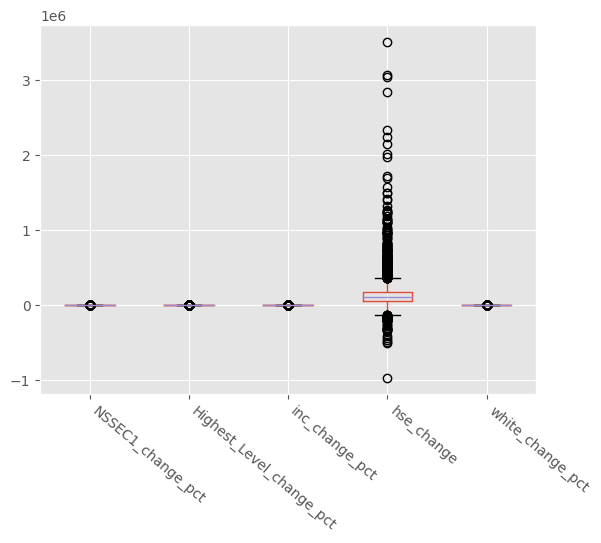

In [444]:
pca_housing_price.boxplot()
plt.xticks(rotation=-40,ha="left", size= 10)
plt.yticks(size=10)
plt.show()

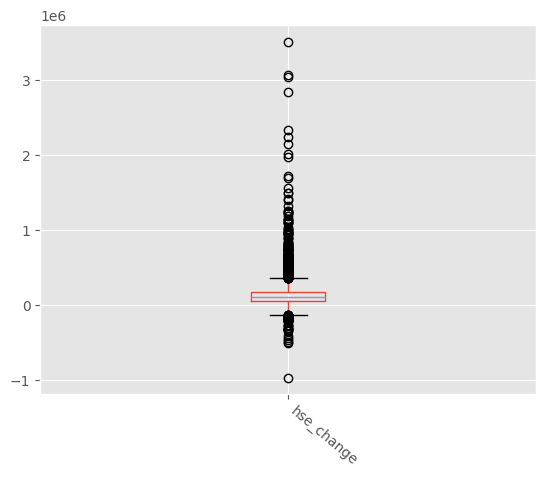

In [445]:
pca_housing_price[["hse_change"]].boxplot()
plt.xticks(rotation=-40,ha="left", size= 10)
plt.yticks(size=10)
plt.show()

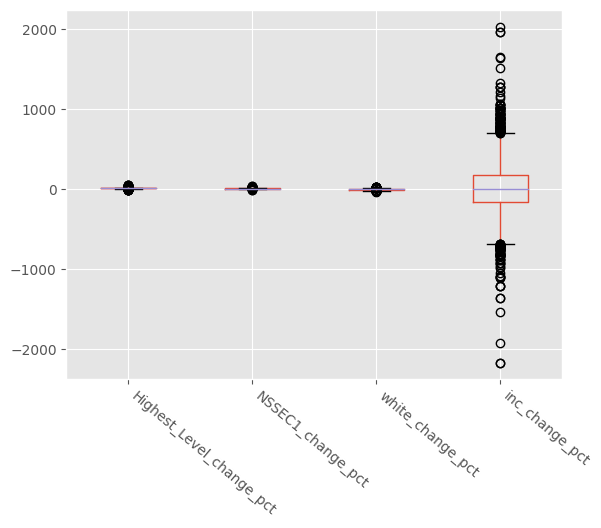

In [446]:
pca_housing_price[[ "Highest_Level_change_pct", "NSSEC1_change_pct" ,"white_change_pct", "inc_change_pct"]].boxplot()
plt.xticks(rotation=-40,ha="left", size= 10)
plt.yticks(size=10)
plt.show()

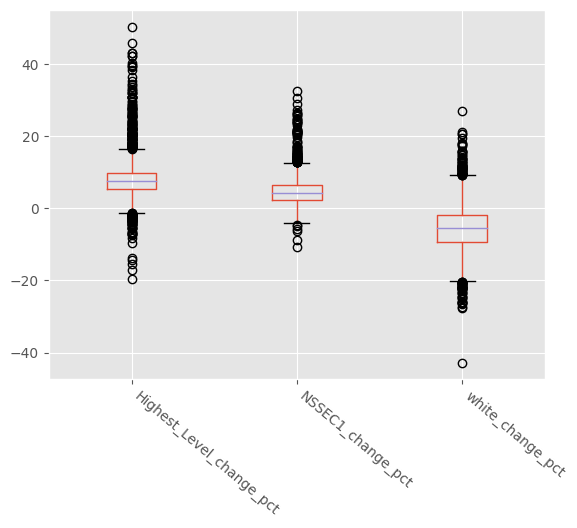

In [447]:
pca_housing_price[[ "Highest_Level_change_pct", "NSSEC1_change_pct" ,"white_change_pct"]].boxplot()
plt.xticks(rotation=-40,ha="left", size= 10)
plt.yticks(size=10)
plt.show()

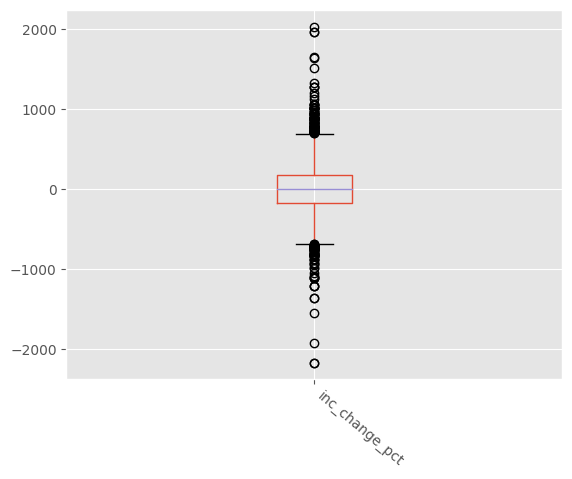

In [448]:
pca_housing_price[["inc_change_pct"]].boxplot()
plt.xticks(rotation=-40,ha="left", size= 10)
plt.yticks(size=10)
plt.show()

In [449]:
pca_housing_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4993
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LSOA21CD                  4994 non-null   object 
 1   NSSEC1_change_pct         4994 non-null   float64
 2   Highest_Level_change_pct  4994 non-null   float64
 3   inc_change_pct            4994 non-null   float64
 4   hse_change                4994 non-null   float64
 5   white_change_pct          4994 non-null   float64
dtypes: float64(5), object(1)
memory usage: 273.1+ KB


In [450]:
histogram_data_pca_housing_price = pca_housing_price.copy()
histogram_data_pca_housing_price = histogram_data_pca_housing_price.drop(histogram_data_pca_housing_price[["LSOA21CD"]], axis=1)
histogram_data_pca_housing_price

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,hse_change,white_change_pct
0,-0.88,-3.40,-140.0,-59329.0,-0.57
1,3.27,4.09,-140.0,-59329.0,-1.52
2,-0.66,3.30,183.0,42151.0,-17.62
3,0.43,8.00,183.0,42151.0,-22.31
4,0.08,2.71,-426.0,77146.0,-3.44
...,...,...,...,...,...
4989,2.21,5.50,468.0,-22854.0,3.17
4990,0.81,5.95,680.0,20648.0,1.66
4991,2.05,7.34,-142.0,68896.0,-3.62
4992,1.07,5.28,201.0,13146.0,-8.14


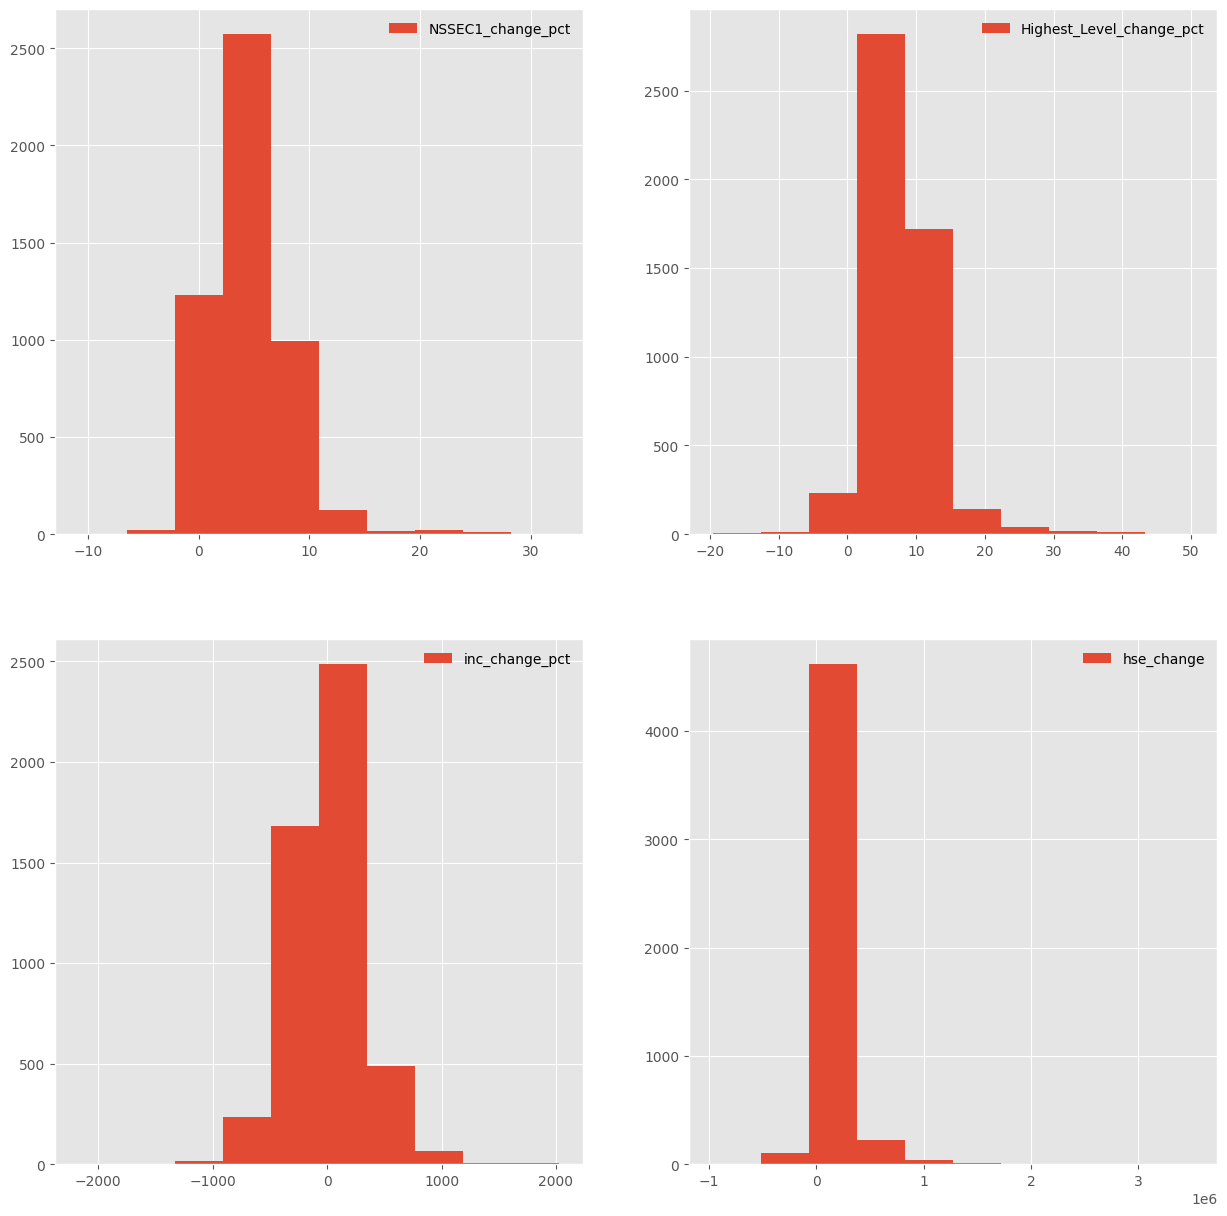

In [451]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

counter = 0
for i in range(2):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(histogram_data_pca_housing_price.columns):

            ax.hist(histogram_data_pca_housing_price[histogram_data_pca_housing_price.columns[counter]], label="{}".format(histogram_data_pca_housing_price.columns[counter]))
            leg = ax.legend(loc="upper right")
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.savefig("histogram_all_scoring_var.png", dpi = 200)
plt.show()

In [452]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# using MinMaxScaler rescaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(histogram_data_pca_housing_price)

print(scaled_data)



[[0.22938738 0.23144042 0.48344844 0.20215274 0.60484449]
 [0.32496545 0.33857817 0.48344844 0.20215274 0.59122832]
 [0.23445417 0.32727793 0.56037152 0.22482628 0.36047012]
 ...
 [0.2968678  0.38506651 0.48297214 0.23080189 0.56112943]
 [0.27429756 0.35560006 0.56465825 0.21834573 0.49634513]
 [0.35076002 0.31669289 0.36699214 0.29006636 0.53318045]]


In [453]:
import pandas as pd
columns = ["Highest_Level_change_pct", "NSSEC1_change_pct", "inc_change_pct", "hse_change" ,"white_change_pct"]
histogram_data_pca_housing_price_normal = pd.DataFrame(scaled_data, columns = columns)


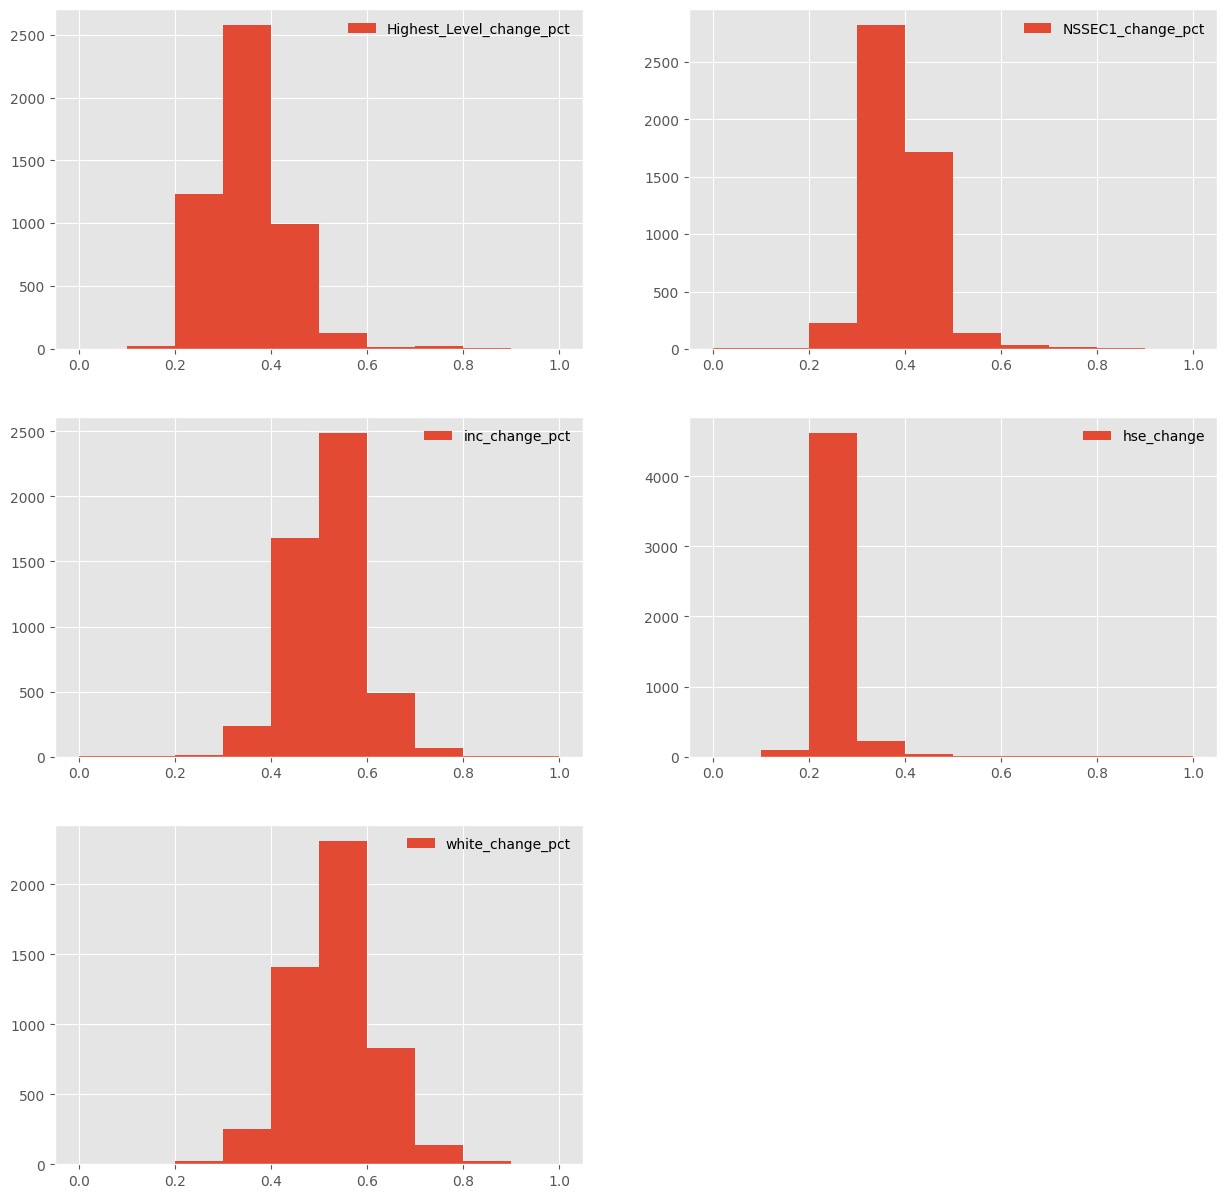

In [454]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

counter = 0
for i in range(3):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(histogram_data_pca_housing_price_normal.columns):

            ax.hist(histogram_data_pca_housing_price_normal[histogram_data_pca_housing_price_normal.columns[counter]], label="{}".format(histogram_data_pca_housing_price_normal.columns[counter]))
            leg = ax.legend(loc="upper right")
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.savefig("histogram_all_scoring_var.png", dpi = 200)
plt.show()

# Scenarios 1 no house price data 

In [455]:
scenarios_1 = histogram_data_pca_housing_price_normal[["NSSEC1_change_pct", "Highest_Level_change_pct", "inc_change_pct", "hse_change", "white_change_pct"]].copy()

In [456]:
has_null = scenarios_1.isnull().any().any()

if has_null:
    print("The DataFrame has missing values.")
else:
    print("The DataFrame does not have any missing values.")

The DataFrame does not have any missing values.


In [457]:
scenarios_1 = scenarios_1.fillna(0)

In [458]:
scenarios_1

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,hse_change,white_change_pct
0,0.231440,0.229387,0.483448,0.202153,0.604844
1,0.338578,0.324965,0.483448,0.202153,0.591228
2,0.327278,0.234454,0.560372,0.224826,0.360470
3,0.394507,0.259558,0.560372,0.224826,0.293249
4,0.318839,0.251497,0.415337,0.232645,0.563709
...,...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.210302,0.658449
4990,0.365184,0.268310,0.678733,0.220022,0.636807
4991,0.385067,0.296868,0.482972,0.230802,0.561129
4992,0.355600,0.274298,0.564658,0.218346,0.496345


# PCA - compared mean price


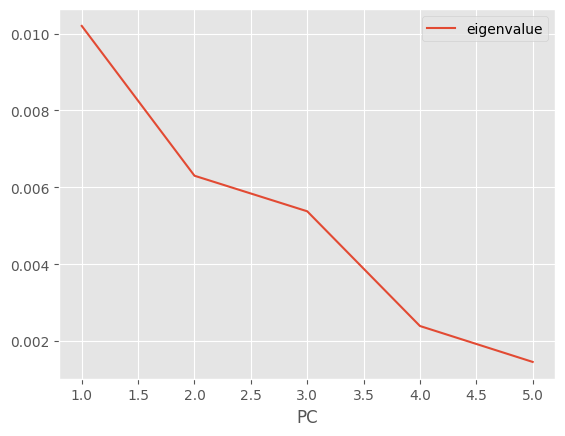

In [459]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(scenarios_1)

df = pd.DataFrame({
    "eigenvalue": pca.explained_variance_,
    "PC": list(range(1, pca.n_components_ + 1))
})
df.plot.line(x="PC", y="eigenvalue")
plt.show()

## component = 1

In [460]:
n_components = 3  

pca_s1 = PCA(n_components= n_components)
a_new_components = pca_s1.fit_transform(scenarios_1)

In [461]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s1.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.39645


In [462]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s1.explained_variance_ratio_[1]))

Explained variance of the SES score is: 0.24494


In [463]:
PCA_scores = pd.DataFrame(pca_s1.transform(scenarios_1))  
PCA_scores.head(10)

,0,1,2
0,-0.121884,-0.178552,-0.000236
1,-0.021341,-0.082569,0.026584
2,-0.194660,0.060662,-0.095895
3,-0.186873,0.152385,-0.094401
4,-0.106576,-0.101944,0.072963
5,-0.125338,0.080142,0.069698
6,-0.084532,0.182171,0.081842
7,0.117104,0.192587,0.131667
8,-0.042578,0.342039,-0.148115
9,-0.123643,0.158640,-0.174011


## All factor

In [464]:

pca_all = decomposition.PCA()             
pca_all.fit(scenarios_1)                      
print(pca_all.explained_variance_ratio_)

[0.39644572 0.2449362  0.20898869 0.0929768  0.05665259]


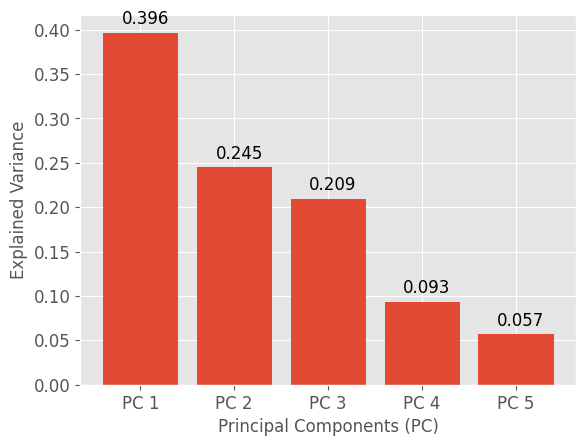

In [465]:
# visualise explained variance for each PC 

plt.bar(["PC 1", "PC 2", "PC 3","PC 4", "PC 5"],pca_all.explained_variance_ratio_)

x = [1,2,3,4,5]

for i in range(len(pca_all.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = pca_all.explained_variance_ratio_[i] + 0.01, s = pca_all.explained_variance_ratio_[i].round(3), size = 12)
    
plt.xlabel("Principal Components (PC)", fontsize=12)
plt.ylabel("Explained Variance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/2926931084.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


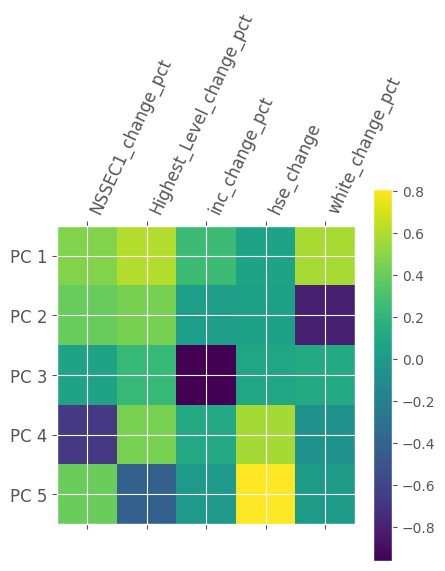

In [466]:

features = ["NSSEC1_change_pct", "Highest_Level_change_pct", "inc_change_pct", "hse_change", "white_change_pct"]

plt.matshow(pca_all.components_,cmap="viridis")
plt.yticks([0,1,2,3,4],["PC 1","PC 2","PC 3","PC 4", "PC 5"],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha="left",fontsize=12)
plt.grid(True) # Display grid

plt.tight_layout()
plt.show()

## Split data into different year

In [467]:
data_2011_for_PCA = scenarios_1[["NSSEC1_change_pct", "Highest_Level_change_pct", "inc_change_pct","hse_change", "white_change_pct"]].copy()

In [468]:
data_2011_for_PCA["scenario1_PCA1"] = PCA_scores[0]
data_2011_for_PCA["scenario1_PCA2"] = PCA_scores[1]
data_2011_for_PCA["scenario1_PCA3"] = PCA_scores[2]
data_2011_for_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,hse_change,white_change_pct,scenario1_PCA1,scenario1_PCA2,scenario1_PCA3
0,0.231440,0.229387,0.483448,0.202153,0.604844,-0.121884,-0.178552,-0.000236
1,0.338578,0.324965,0.483448,0.202153,0.591228,-0.021341,-0.082569,0.026584
2,0.327278,0.234454,0.560372,0.224826,0.360470,-0.194660,0.060662,-0.095895
3,0.394507,0.259558,0.560372,0.224826,0.293249,-0.186873,0.152385,-0.094401
4,0.318839,0.251497,0.415337,0.232645,0.563709,-0.106576,-0.101944,0.072963
...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.210302,0.658449,0.050345,-0.134723,-0.107606
4990,0.365184,0.268310,0.678733,0.220022,0.636807,0.034891,-0.127333,-0.164974
4991,0.385067,0.296868,0.482972,0.230802,0.561129,-0.032076,-0.051465,0.022068
4992,0.355600,0.274298,0.564658,0.218346,0.496345,-0.077301,-0.019347,-0.072529


In [469]:
path = "data/Output/pca/"

In [470]:
data_2011_for_PCA.to_csv(path + "scenrio1_change_pct_pca.csv")

## Analysis

In [471]:
analyse_PCA = pd.read_csv(path + "/scenrio1_change_pct_pca.csv")

In [472]:
analyse_PCA.drop(columns = "Unnamed: 0", inplace=True)
analyse_PCA.head()

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,hse_change,white_change_pct,scenario1_PCA1,scenario1_PCA2,scenario1_PCA3
0,0.231440,0.229387,0.483448,0.202153,0.604844,-0.121884,-0.178552,-0.000236
1,0.338578,0.324965,0.483448,0.202153,0.591228,-0.021341,-0.082569,0.026584
2,0.327278,0.234454,0.560372,0.224826,0.360470,-0.194660,0.060662,-0.095895
3,0.394507,0.259558,0.560372,0.224826,0.293249,-0.186873,0.152385,-0.094401
4,0.318839,0.251497,0.415337,0.232645,0.563709,-0.106576,-0.101944,0.072963


In [473]:
analyse_PCA["scenario1_PCA_total"] = analyse_PCA["scenario1_PCA1"] + analyse_PCA["scenario1_PCA2"] + analyse_PCA["scenario1_PCA3"]

In [474]:
analyse_PCA["scenario1_PCA_total_zscore"] = zscore(analyse_PCA["scenario1_PCA_total"])

In [475]:
print(analyse_PCA["scenario1_PCA_total_zscore"].quantile(0.90))
print(analyse_PCA["scenario1_PCA_total_zscore"].quantile(0.05))

0.9785530023200802
-1.3158834390191043


In [477]:
analyse_PCA["scenario1_status"] = "status"

for i in range(len(analyse_PCA)):
    if  analyse_PCA["scenario1_PCA1"][i] > analyse_PCA["scenario1_PCA1"].quantile(0.75) or  analyse_PCA["scenario1_PCA_total_zscore"][i]> analyse_PCA["scenario1_PCA_total_zscore"].quantile(0.90):
        analyse_PCA["scenario1_status"][i] = "ascent"
    elif analyse_PCA["scenario1_PCA1"][i] < analyse_PCA["scenario1_PCA1"].quantile(0.25) or analyse_PCA["scenario1_PCA_total_zscore"][i]< analyse_PCA["scenario1_PCA_total_zscore"].quantile(0.10):
        analyse_PCA["scenario1_status"][i] = "descent"

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/3550059047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyse_PCA["scenario1_status"][i] = "descent"
/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/3550059047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyse_PCA["scenario1_status"][i] = "ascent"


In [478]:
analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,hse_change,white_change_pct,scenario1_PCA1,scenario1_PCA2,scenario1_PCA3,scenario1_PCA_total,scenario1_PCA_total_zscore,scenario1_status
0,0.231440,0.229387,0.483448,0.202153,0.604844,-0.121884,-0.178552,-0.000236,-0.300672,-2.032925,descent
1,0.338578,0.324965,0.483448,0.202153,0.591228,-0.021341,-0.082569,0.026584,-0.077326,-0.522820,status
2,0.327278,0.234454,0.560372,0.224826,0.360470,-0.194660,0.060662,-0.095895,-0.229893,-1.554370,descent
3,0.394507,0.259558,0.560372,0.224826,0.293249,-0.186873,0.152385,-0.094401,-0.128889,-0.871453,descent
4,0.318839,0.251497,0.415337,0.232645,0.563709,-0.106576,-0.101944,0.072963,-0.135557,-0.916537,descent
...,...,...,...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.210302,0.658449,0.050345,-0.134723,-0.107606,-0.191985,-1.298060,ascent
4990,0.365184,0.268310,0.678733,0.220022,0.636807,0.034891,-0.127333,-0.164974,-0.257416,-1.740459,descent
4991,0.385067,0.296868,0.482972,0.230802,0.561129,-0.032076,-0.051465,0.022068,-0.061474,-0.415644,status
4992,0.355600,0.274298,0.564658,0.218346,0.496345,-0.077301,-0.019347,-0.072529,-0.169177,-1.143853,descent


In [479]:
analyse_PCA.groupby(analyse_PCA["scenario1_status"]).size()

scenario1_status
ascent     1357
descent    1450
status     2187
dtype: int64

In [480]:
# scenario1_status
# ascent     1357
# descent    1450
# status     2187
# dtype: int64

In [481]:
analyse_PCA["LSOA21CD"] = pca_housing_price["LSOA21CD"] 

In [482]:
analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,hse_change,white_change_pct,scenario1_PCA1,scenario1_PCA2,scenario1_PCA3,scenario1_PCA_total,scenario1_PCA_total_zscore,scenario1_status,LSOA21CD
0,0.231440,0.229387,0.483448,0.202153,0.604844,-0.121884,-0.178552,-0.000236,-0.300672,-2.032925,descent,E01034473
1,0.338578,0.324965,0.483448,0.202153,0.591228,-0.021341,-0.082569,0.026584,-0.077326,-0.522820,status,E01034474
2,0.327278,0.234454,0.560372,0.224826,0.360470,-0.194660,0.060662,-0.095895,-0.229893,-1.554370,descent,E01034471
3,0.394507,0.259558,0.560372,0.224826,0.293249,-0.186873,0.152385,-0.094401,-0.128889,-0.871453,descent,E01034472
4,0.318839,0.251497,0.415337,0.232645,0.563709,-0.106576,-0.101944,0.072963,-0.135557,-0.916537,descent,E01034475
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.210302,0.658449,0.050345,-0.134723,-0.107606,-0.191985,-1.298060,ascent,E01033742
4990,0.365184,0.268310,0.678733,0.220022,0.636807,0.034891,-0.127333,-0.164974,-0.257416,-1.740459,descent,E01033743
4991,0.385067,0.296868,0.482972,0.230802,0.561129,-0.032076,-0.051465,0.022068,-0.061474,-0.415644,status,E01033744
4992,0.355600,0.274298,0.564658,0.218346,0.496345,-0.077301,-0.019347,-0.072529,-0.169177,-1.143853,descent,E01033745


In [483]:
# export all ascent data
ascent_data = analyse_PCA[analyse_PCA["scenario1_status"] == "ascent"]

In [484]:
analyse_PCA.to_csv(path + "/scenrio1_change_pct_pca_tpye_compared_mean.csv")
ascent_data.to_csv(path + "/scenrio1_change_pct_pca_result_ascent_datacompared_mean.csv")

In [485]:
# status  
# ascent      638
# descent     345
# status     4145
# dtype: int64

# scenarios 2

In [486]:
scenarios_2 = histogram_data_pca_housing_price_normal[["NSSEC1_change_pct", "Highest_Level_change_pct", "hse_change", "white_change_pct"]].copy()

In [487]:
has_null_s2 = scenarios_2.isnull().any().any()

if has_null:
    print("The DataFrame has missing values.")
else:
    print("The DataFrame does not have any missing values.")

The DataFrame does not have any missing values.


In [488]:
scenarios_2 = scenarios_2.fillna(0)

In [489]:
scenarios_2

,NSSEC1_change_pct,Highest_Level_change_pct,hse_change,white_change_pct
0,0.231440,0.229387,0.202153,0.604844
1,0.338578,0.324965,0.202153,0.591228
2,0.327278,0.234454,0.224826,0.360470
3,0.394507,0.259558,0.224826,0.293249
4,0.318839,0.251497,0.232645,0.563709
...,...,...,...,...
4989,0.358747,0.300553,0.210302,0.658449
4990,0.365184,0.268310,0.220022,0.636807
4991,0.385067,0.296868,0.230802,0.561129
4992,0.355600,0.274298,0.218346,0.496345


# PCA - compared mean price


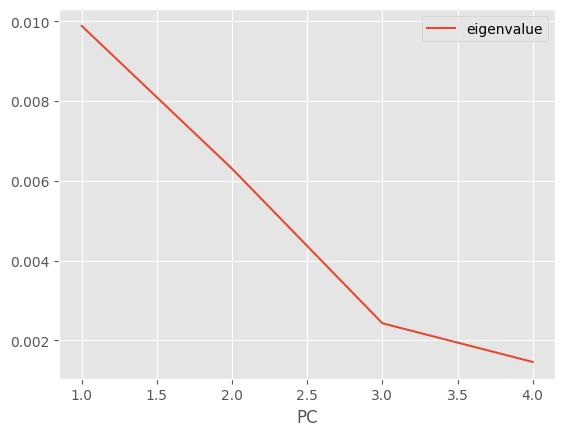

In [490]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(scenarios_2)

df = pd.DataFrame({
    "eigenvalue": pca.explained_variance_,
    "PC": list(range(1, pca.n_components_ + 1))
})
df.plot.line(x="PC", y="eigenvalue")
plt.show()

## component = 1

In [491]:
n_components_s2 = 3 

pca_s2 = PCA(n_components= n_components_s2)
a_new_components_s2 = pca_s2.fit_transform(scenarios_2)
a_new_components_s2

array([[-0.11639602, -0.17872772,  0.01871062],
       [-0.01284366, -0.0817357 , -0.0068739 ],
       [-0.21308645,  0.05727233, -0.02045351],
       ...,
       [-0.02421032, -0.05078659, -0.03343501],
       [-0.09271968, -0.02173051, -0.02926829],
       [-0.03543762, -0.02919407,  0.07274721]])

In [492]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s2.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.49240


In [493]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s2.explained_variance_ratio_[1]))

Explained variance of the SES score is: 0.31401


In [494]:
scenarios_2_PCA_scores = pd.DataFrame(pca_s2.transform(scenarios_2))  
scenarios_2_PCA_scores.head(10)

,0,1,2
0,-0.116396,-0.178728,0.018711
1,-0.012844,-0.081736,-0.006874
2,-0.213086,0.057272,-0.020454
3,-0.205563,0.149038,-0.050802
4,-0.082961,-0.099817,-0.009857
5,-0.103143,0.082070,-0.044527
6,-0.061313,0.184522,-0.061016
7,0.146896,0.196914,-0.097623
8,-0.081582,0.337219,-0.068750
9,-0.164963,0.152933,-0.057089


## All factor

In [495]:
scenarios_2

,NSSEC1_change_pct,Highest_Level_change_pct,hse_change,white_change_pct
0,0.231440,0.229387,0.202153,0.604844
1,0.338578,0.324965,0.202153,0.591228
2,0.327278,0.234454,0.224826,0.360470
3,0.394507,0.259558,0.224826,0.293249
4,0.318839,0.251497,0.232645,0.563709
...,...,...,...,...
4989,0.358747,0.300553,0.210302,0.658449
4990,0.365184,0.268310,0.220022,0.636807
4991,0.385067,0.296868,0.230802,0.561129
4992,0.355600,0.274298,0.218346,0.496345


In [496]:
# scenarios_2_pca_all

In [497]:

scenarios_2_pca_all = decomposition.PCA()             
scenarios_2_pca_all.fit(scenarios_2)                      
print(scenarios_2_pca_all.explained_variance_ratio_)

[0.4924009  0.31401008 0.12094695 0.07264207]


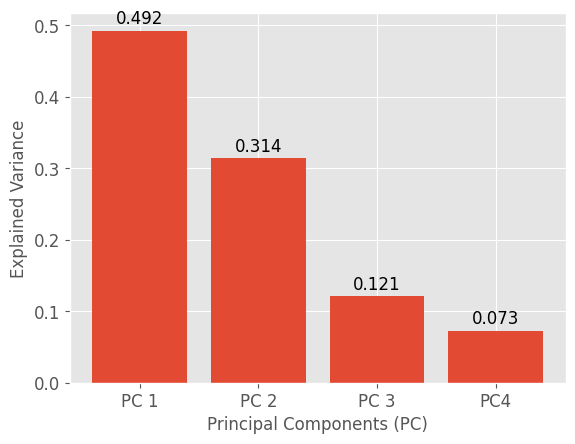

In [498]:

plt.bar(["PC 1", "PC 2", "PC 3","PC4"],scenarios_2_pca_all.explained_variance_ratio_)

x = [1,2,3,4]

for i in range(len(scenarios_2_pca_all.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = scenarios_2_pca_all.explained_variance_ratio_[i] + 0.01, s = scenarios_2_pca_all.explained_variance_ratio_[i].round(3), size = 12)
    
plt.xlabel("Principal Components (PC)", fontsize=12)
plt.ylabel("Explained Variance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/2571389567.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


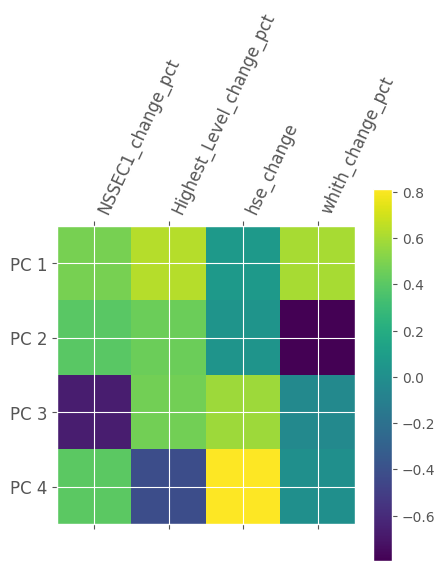

In [499]:

features = ["NSSEC1_change_pct", "Highest_Level_change_pct", "hse_change", "whith_change_pct"]

plt.matshow(scenarios_2_pca_all.components_,cmap="viridis")
plt.yticks([0,1,2,3],["PC 1","PC 2","PC 3","PC 4"],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha="left",fontsize=12)
plt.grid(True) # Display grid

plt.tight_layout()
plt.show()

## Split data into different year

In [500]:
scenarios_2_for_PCA = scenarios_2[["NSSEC1_change_pct", "Highest_Level_change_pct","hse_change","white_change_pct"]].copy()

In [501]:
scenarios_2_for_PCA["scenarios_2_PCA1"] = scenarios_2_PCA_scores[0]
scenarios_2_for_PCA["scenarios_2_PCA2"] = scenarios_2_PCA_scores[1]
scenarios_2_for_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,hse_change,white_change_pct,scenarios_2_PCA1,scenarios_2_PCA2
0,0.231440,0.229387,0.202153,0.604844,-0.116396,-0.178728
1,0.338578,0.324965,0.202153,0.591228,-0.012844,-0.081736
2,0.327278,0.234454,0.224826,0.360470,-0.213086,0.057272
3,0.394507,0.259558,0.224826,0.293249,-0.205563,0.149038
4,0.318839,0.251497,0.232645,0.563709,-0.082961,-0.099817
...,...,...,...,...,...,...
4989,0.358747,0.300553,0.210302,0.658449,0.022708,-0.137895
4990,0.365184,0.268310,0.220022,0.636807,-0.006868,-0.132318
4991,0.385067,0.296868,0.230802,0.561129,-0.024210,-0.050787
4992,0.355600,0.274298,0.218346,0.496345,-0.092720,-0.021731


In [502]:
path = "data/Output/pca"

In [503]:
scenarios_2_for_PCA.to_csv(path + "/scenrio2_change_pct_pca.csv")

## Analysis

In [504]:
senarios_2_analyse_PCA = pd.read_csv(path + "/scenrio2_change_pct_pca.csv")

In [505]:
senarios_2_analyse_PCA.drop(columns = "Unnamed: 0", inplace=True)
senarios_2_analyse_PCA.head()

,NSSEC1_change_pct,Highest_Level_change_pct,hse_change,white_change_pct,scenarios_2_PCA1,scenarios_2_PCA2
0,0.231440,0.229387,0.202153,0.604844,-0.116396,-0.178728
1,0.338578,0.324965,0.202153,0.591228,-0.012844,-0.081736
2,0.327278,0.234454,0.224826,0.360470,-0.213086,0.057272
3,0.394507,0.259558,0.224826,0.293249,-0.205563,0.149038
4,0.318839,0.251497,0.232645,0.563709,-0.082961,-0.099817


In [506]:
senarios_2_analyse_PCA["scenarios_2_PCA_total"] = senarios_2_analyse_PCA["scenarios_2_PCA1"] + senarios_2_analyse_PCA["scenarios_2_PCA2"]

In [507]:
senarios_2_analyse_PCA["scenarios_2_PCA_total_zscore"] = zscore(senarios_2_analyse_PCA["scenarios_2_PCA_total"])

In [508]:
print(senarios_2_analyse_PCA["scenarios_2_PCA_total_zscore"].quantile(0.75))
print(senarios_2_analyse_PCA["scenarios_2_PCA_total_zscore"].quantile(0.25))

0.443502444655364
-0.5515990618159969


In [510]:
senarios_2_analyse_PCA["scenarios_2_status"] = "status"

for i in range(len(analyse_PCA)):
    if  senarios_2_analyse_PCA["scenarios_2_PCA1"][i] > senarios_2_analyse_PCA["scenarios_2_PCA1"].quantile(0.75) or  senarios_2_analyse_PCA["scenarios_2_PCA_total_zscore"][i]> senarios_2_analyse_PCA["scenarios_2_PCA_total_zscore"].quantile(0.90):
        senarios_2_analyse_PCA["scenarios_2_status"][i] = "ascent"
    elif senarios_2_analyse_PCA["scenarios_2_PCA1"][i] < senarios_2_analyse_PCA["scenarios_2_PCA1"].quantile(0.25) or senarios_2_analyse_PCA["scenarios_2_PCA_total_zscore"][i]< senarios_2_analyse_PCA["scenarios_2_PCA_total_zscore"].quantile(0.10):
        senarios_2_analyse_PCA["scenarios_2_status"][i] = "descent"

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/195161446.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senarios_2_analyse_PCA["scenarios_2_status"][i] = "descent"
/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/195161446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senarios_2_analyse_PCA["scenarios_2_status"][i] = "ascent"


In [511]:
senarios_2_analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,hse_change,white_change_pct,scenarios_2_PCA1,scenarios_2_PCA2,scenarios_2_PCA_total,scenarios_2_PCA_total_zscore,scenarios_2_status
0,0.231440,0.229387,0.202153,0.604844,-0.116396,-0.178728,-0.295124,-2.320249,descent
1,0.338578,0.324965,0.202153,0.591228,-0.012844,-0.081736,-0.094579,-0.743578,status
2,0.327278,0.234454,0.224826,0.360470,-0.213086,0.057272,-0.155814,-1.225003,descent
3,0.394507,0.259558,0.224826,0.293249,-0.205563,0.149038,-0.056525,-0.444398,descent
4,0.318839,0.251497,0.232645,0.563709,-0.082961,-0.099817,-0.182778,-1.436992,descent
...,...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.210302,0.658449,0.022708,-0.137895,-0.115187,-0.905597,status
4990,0.365184,0.268310,0.220022,0.636807,-0.006868,-0.132318,-0.139186,-1.094275,descent
4991,0.385067,0.296868,0.230802,0.561129,-0.024210,-0.050787,-0.074997,-0.589622,status
4992,0.355600,0.274298,0.218346,0.496345,-0.092720,-0.021731,-0.114450,-0.899802,descent


In [512]:
senarios_2_analyse_PCA.groupby(senarios_2_analyse_PCA["scenarios_2_status"]).size()

scenarios_2_status
ascent     1322
descent    1441
status     2231
dtype: int64

In [513]:
# scenarios_2_status
# ascent     1322
# descent    1441
# status     2231
# dtype: int64

In [514]:
senarios_2_analyse_PCA["LSOA21CD"] = pca_housing_price["LSOA21CD"] 

In [515]:
senarios_2_analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,hse_change,white_change_pct,scenarios_2_PCA1,scenarios_2_PCA2,scenarios_2_PCA_total,scenarios_2_PCA_total_zscore,scenarios_2_status,LSOA21CD
0,0.231440,0.229387,0.202153,0.604844,-0.116396,-0.178728,-0.295124,-2.320249,descent,E01034473
1,0.338578,0.324965,0.202153,0.591228,-0.012844,-0.081736,-0.094579,-0.743578,status,E01034474
2,0.327278,0.234454,0.224826,0.360470,-0.213086,0.057272,-0.155814,-1.225003,descent,E01034471
3,0.394507,0.259558,0.224826,0.293249,-0.205563,0.149038,-0.056525,-0.444398,descent,E01034472
4,0.318839,0.251497,0.232645,0.563709,-0.082961,-0.099817,-0.182778,-1.436992,descent,E01034475
...,...,...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.210302,0.658449,0.022708,-0.137895,-0.115187,-0.905597,status,E01033742
4990,0.365184,0.268310,0.220022,0.636807,-0.006868,-0.132318,-0.139186,-1.094275,descent,E01033743
4991,0.385067,0.296868,0.230802,0.561129,-0.024210,-0.050787,-0.074997,-0.589622,status,E01033744
4992,0.355600,0.274298,0.218346,0.496345,-0.092720,-0.021731,-0.114450,-0.899802,descent,E01033745


In [516]:
# export all ascent data
senarios_2_ascent_data = senarios_2_analyse_PCA[senarios_2_analyse_PCA["scenarios_2_status"] == "ascent"]

In [517]:
senarios_2_analyse_PCA.to_csv(path + "/scenrio2_change_pct_pca_tpye_compared_mean.csv")
senarios_2_ascent_data.to_csv(path + "/scenrio2_pct_pca_result_ascent_datacompared_mean.csv")

In [518]:
# status  未改变price
# ascent      638
# descent     345
# status     4145
# dtype: int64

# scenarios 3

In [519]:
scenarios_3 = histogram_data_pca_housing_price_normal[["NSSEC1_change_pct", "Highest_Level_change_pct", "inc_change_pct", "white_change_pct"]].copy()

In [520]:
has_null_s3 = scenarios_3.isnull().any().any()

if has_null_s3:
    print("The DataFrame has missing values.")
else:
    print("The DataFrame does not have any missing values.")

The DataFrame does not have any missing values.


In [521]:
scenarios_3 = scenarios_3.fillna(0)

In [522]:
scenarios_3

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,white_change_pct
0,0.231440,0.229387,0.483448,0.604844
1,0.338578,0.324965,0.483448,0.591228
2,0.327278,0.234454,0.560372,0.360470
3,0.394507,0.259558,0.560372,0.293249
4,0.318839,0.251497,0.415337,0.563709
...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.658449
4990,0.365184,0.268310,0.678733,0.636807
4991,0.385067,0.296868,0.482972,0.561129
4992,0.355600,0.274298,0.564658,0.496345


# PCA - compared mean price


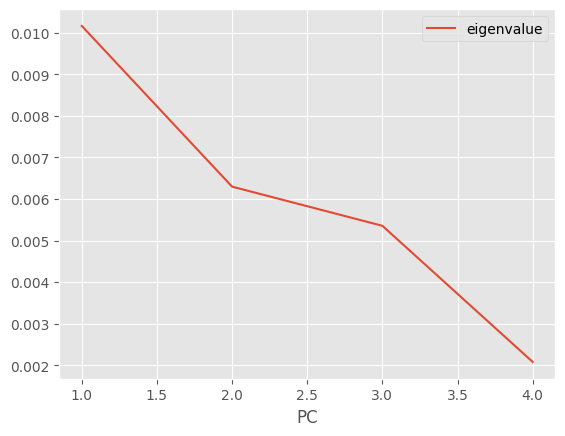

In [523]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(scenarios_3)

df = pd.DataFrame({
    "eigenvalue": pca.explained_variance_,
    "PC": list(range(1, pca.n_components_ + 1))
})
df.plot.line(x="PC", y="eigenvalue")
plt.show()

## component = 1

In [524]:
n_components_s3 = 3


pca_s3 = PCA(n_components= n_components_s3)
a_new_components_s3 = pca_s3.fit_transform(scenarios_3)

In [525]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s3.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.42530


In [526]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s3.explained_variance_ratio_[1]))

Explained variance of the SES score is: 0.26352


In [527]:
scenarios_3_PCA_scores = pd.DataFrame(pca_s3.transform(scenarios_3))  
scenarios_3_PCA_scores.head(10)

,0,1,2
0,-0.118750,-0.177835,-0.000745
1,-0.018276,-0.081468,0.028726
2,-0.193348,0.061580,-0.095272
3,-0.185691,0.153510,-0.092042
4,-0.105784,-0.102803,0.072074
5,-0.124968,0.079469,0.071589
6,-0.084358,0.181697,0.085760
7,0.117641,0.192773,0.138194
8,-0.042157,0.344261,-0.142702
9,-0.122789,0.160592,-0.172087


## All factor

In [528]:

scenarios_3_pca_all = decomposition.PCA()             
scenarios_3_pca_all.fit(scenarios_3)                      
print(scenarios_3_pca_all.explained_variance_ratio_)

[0.42529535 0.2635175  0.22410912 0.08707803]


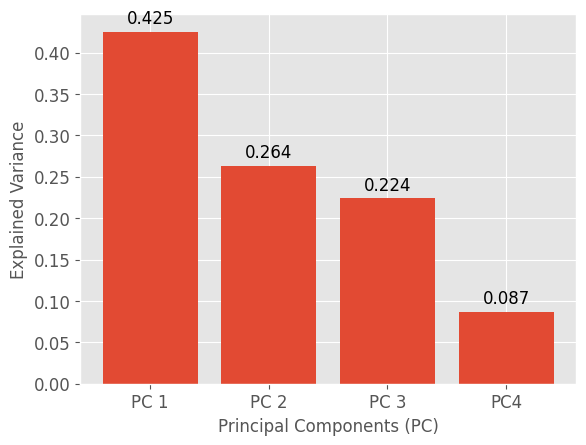

In [529]:


plt.bar(["PC 1", "PC 2", "PC 3","PC4"],scenarios_3_pca_all.explained_variance_ratio_)

x = [1,2,3,4]

for i in range(len(scenarios_3_pca_all.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = scenarios_3_pca_all.explained_variance_ratio_[i] + 0.01, s = scenarios_3_pca_all.explained_variance_ratio_[i].round(3), size = 12)
    
plt.xlabel("Principal Components (PC)", fontsize=12)
plt.ylabel("Explained Variance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/2268137701.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


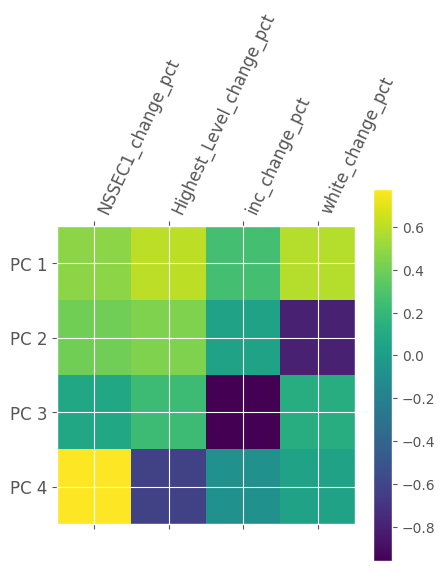

In [530]:

features = ["NSSEC1_change_pct", "Highest_Level_change_pct", "inc_change_pct", "white_change_pct"]

plt.matshow(scenarios_3_pca_all.components_,cmap="viridis")
plt.yticks([0,1,2,3],["PC 1","PC 2","PC 3","PC 4"],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha="left",fontsize=12)
plt.grid(True) # Display grid

plt.tight_layout()
plt.show()

## Split data into different year

In [531]:
scenarios_3_for_PCA = scenarios_3[["NSSEC1_change_pct", "Highest_Level_change_pct", "inc_change_pct", "white_change_pct"]].copy()

In [532]:
scenarios_3_for_PCA["scenarios_3_PCA1"] = scenarios_3_PCA_scores[0]
scenarios_3_for_PCA["scenarios_3_PCA2"] = scenarios_3_PCA_scores[1]
scenarios_3_for_PCA["scenarios_3_PCA3"] = scenarios_3_PCA_scores[2]
scenarios_3_for_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,white_change_pct,scenarios_3_PCA1,scenarios_3_PCA2,scenarios_3_PCA3
0,0.231440,0.229387,0.483448,0.604844,-0.118750,-0.177835,-0.000745
1,0.338578,0.324965,0.483448,0.591228,-0.018276,-0.081468,0.028726
2,0.327278,0.234454,0.560372,0.360470,-0.193348,0.061580,-0.095272
3,0.394507,0.259558,0.560372,0.293249,-0.185691,0.153510,-0.092042
4,0.318839,0.251497,0.415337,0.563709,-0.105784,-0.102803,0.072074
...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.658449,0.053792,-0.131989,-0.106356
4990,0.365184,0.268310,0.678733,0.636807,0.037924,-0.124315,-0.164517
4991,0.385067,0.296868,0.482972,0.561129,-0.030864,-0.051196,0.022783
4992,0.355600,0.274298,0.564658,0.496345,-0.075128,-0.017864,-0.071284


In [533]:
path = "data/Output/pca"

In [534]:
scenarios_3_for_PCA.to_csv(path + "/scenrio3_change_pct_pca.csv")

## Analysis

In [535]:
scenarios_3_analyse_PCA = pd.read_csv(path + "/scenrio3_change_pct_pca.csv")

In [536]:
scenarios_3_analyse_PCA.drop(columns = "Unnamed: 0", inplace=True)
scenarios_3_analyse_PCA.head()

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,white_change_pct,scenarios_3_PCA1,scenarios_3_PCA2,scenarios_3_PCA3
0,0.231440,0.229387,0.483448,0.604844,-0.118750,-0.177835,-0.000745
1,0.338578,0.324965,0.483448,0.591228,-0.018276,-0.081468,0.028726
2,0.327278,0.234454,0.560372,0.360470,-0.193348,0.061580,-0.095272
3,0.394507,0.259558,0.560372,0.293249,-0.185691,0.153510,-0.092042
4,0.318839,0.251497,0.415337,0.563709,-0.105784,-0.102803,0.072074


In [537]:
scenarios_3_analyse_PCA["scenarios_3_PCA_total"] = scenarios_3_analyse_PCA["scenarios_3_PCA1"] + scenarios_3_analyse_PCA["scenarios_3_PCA2"] + scenarios_3_analyse_PCA["scenarios_3_PCA3"]

In [538]:
scenarios_3_analyse_PCA["scenarios_3_PCA_total_zscore"] = zscore(scenarios_3_analyse_PCA["scenarios_3_PCA_total"])

In [539]:
print(scenarios_3_analyse_PCA["scenarios_3_PCA2"].quantile(0.75))
print(scenarios_3_analyse_PCA["scenarios_3_PCA2"].quantile(0.25))

0.04454857089466415
-0.043550112495145975


In [541]:
scenarios_3_analyse_PCA["scenarios_3_status"] = "status"

for i in range(len(scenarios_3_analyse_PCA)):
    if  scenarios_3_analyse_PCA["scenarios_3_PCA1"][i] > scenarios_3_analyse_PCA["scenarios_3_PCA1"].quantile(0.75) or  scenarios_3_analyse_PCA["scenarios_3_PCA_total_zscore"][i]> scenarios_3_analyse_PCA["scenarios_3_PCA_total_zscore"].quantile(0.90):
        scenarios_3_analyse_PCA["scenarios_3_status"][i] = "ascent"
    elif scenarios_3_analyse_PCA["scenarios_3_PCA1"][i] < scenarios_3_analyse_PCA["scenarios_3_PCA1"].quantile(0.25) or scenarios_3_analyse_PCA["scenarios_3_PCA_total_zscore"][i]< scenarios_3_analyse_PCA["scenarios_3_PCA_total_zscore"].quantile(0.10):
        scenarios_3_analyse_PCA["scenarios_3_status"][i] = "descent"

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/176101858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenarios_3_analyse_PCA["scenarios_3_status"][i] = "descent"
/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/176101858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenarios_3_analyse_PCA["scenarios_3_status"][i] = "ascent"


In [542]:
scenarios_3_analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,white_change_pct,scenarios_3_PCA1,scenarios_3_PCA2,scenarios_3_PCA3,scenarios_3_PCA_total,scenarios_3_PCA_total_zscore,scenarios_3_status
0,0.231440,0.229387,0.483448,0.604844,-0.118750,-0.177835,-0.000745,-0.297330,-2.013443,descent
1,0.338578,0.324965,0.483448,0.591228,-0.018276,-0.081468,0.028726,-0.071017,-0.480912,status
2,0.327278,0.234454,0.560372,0.360470,-0.193348,0.061580,-0.095272,-0.227040,-1.537462,descent
3,0.394507,0.259558,0.560372,0.293249,-0.185691,0.153510,-0.092042,-0.124223,-0.841210,descent
4,0.318839,0.251497,0.415337,0.563709,-0.105784,-0.102803,0.072074,-0.136513,-0.924433,descent
...,...,...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.658449,0.053792,-0.131989,-0.106356,-0.184552,-1.249742,ascent
4990,0.365184,0.268310,0.678733,0.636807,0.037924,-0.124315,-0.164517,-0.250908,-1.699087,descent
4991,0.385067,0.296868,0.482972,0.561129,-0.030864,-0.051196,0.022783,-0.059278,-0.401413,status
4992,0.355600,0.274298,0.564658,0.496345,-0.075128,-0.017864,-0.071284,-0.164275,-1.112430,descent


In [543]:
scenarios_3_analyse_PCA.groupby(scenarios_3_analyse_PCA["scenarios_3_status"]).size()

scenarios_3_status
ascent     1358
descent    1458
status     2178
dtype: int64

In [544]:
# scenarios_3_status
# ascent     1358
# descent    1458
# status     2178
# dtype: int64

In [545]:
scenarios_3_analyse_PCA["LSOA21CD"] = pca_housing_price["LSOA21CD"] 

In [546]:
scenarios_3_analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,inc_change_pct,white_change_pct,scenarios_3_PCA1,scenarios_3_PCA2,scenarios_3_PCA3,scenarios_3_PCA_total,scenarios_3_PCA_total_zscore,scenarios_3_status,LSOA21CD
0,0.231440,0.229387,0.483448,0.604844,-0.118750,-0.177835,-0.000745,-0.297330,-2.013443,descent,E01034473
1,0.338578,0.324965,0.483448,0.591228,-0.018276,-0.081468,0.028726,-0.071017,-0.480912,status,E01034474
2,0.327278,0.234454,0.560372,0.360470,-0.193348,0.061580,-0.095272,-0.227040,-1.537462,descent,E01034471
3,0.394507,0.259558,0.560372,0.293249,-0.185691,0.153510,-0.092042,-0.124223,-0.841210,descent,E01034472
4,0.318839,0.251497,0.415337,0.563709,-0.105784,-0.102803,0.072074,-0.136513,-0.924433,descent,E01034475
...,...,...,...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.628245,0.658449,0.053792,-0.131989,-0.106356,-0.184552,-1.249742,ascent,E01033742
4990,0.365184,0.268310,0.678733,0.636807,0.037924,-0.124315,-0.164517,-0.250908,-1.699087,descent,E01033743
4991,0.385067,0.296868,0.482972,0.561129,-0.030864,-0.051196,0.022783,-0.059278,-0.401413,status,E01033744
4992,0.355600,0.274298,0.564658,0.496345,-0.075128,-0.017864,-0.071284,-0.164275,-1.112430,descent,E01033745


In [547]:
# export all ascent data
scenarios_3_ascent_data = scenarios_3_analyse_PCA[scenarios_3_analyse_PCA["scenarios_3_status"] == "ascent"]

In [548]:
scenarios_3_analyse_PCA.to_csv(path + "/scenrio3_change_pct_pca_tpye_compared_mean.csv")
scenarios_3_ascent_data.to_csv(path + "/scenrio3_change_pct_pca_result_ascent_datacompared_mean.csv")

# scenarios 4

In [549]:
scenarios_4 = histogram_data_pca_housing_price_normal[["NSSEC1_change_pct", "Highest_Level_change_pct", "white_change_pct"]].copy()

In [550]:
has_null_s4 = scenarios_4.isnull().any().any()

if has_null:
    print("The DataFrame has missing values.")
else:
    print("The DataFrame does not have any missing values.")

The DataFrame does not have any missing values.


In [551]:
scenarios_4 = scenarios_4.fillna(0)

In [552]:
scenarios_4

,NSSEC1_change_pct,Highest_Level_change_pct,white_change_pct
0,0.231440,0.229387,0.604844
1,0.338578,0.324965,0.591228
2,0.327278,0.234454,0.360470
3,0.394507,0.259558,0.293249
4,0.318839,0.251497,0.563709
...,...,...,...
4989,0.358747,0.300553,0.658449
4990,0.365184,0.268310,0.636807
4991,0.385067,0.296868,0.561129
4992,0.355600,0.274298,0.496345


# PCA - compared mean price


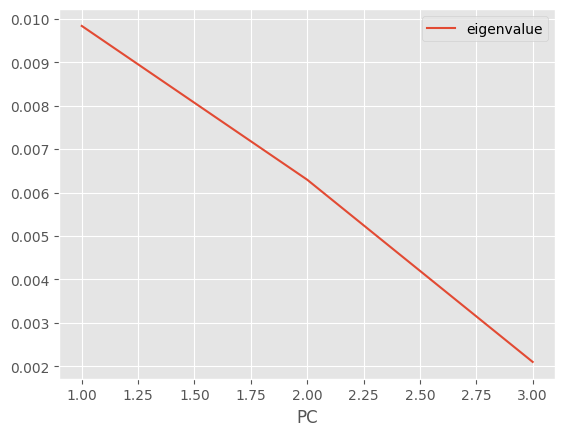

In [553]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(scenarios_4)

df = pd.DataFrame({
    "eigenvalue": pca.explained_variance_,
    "PC": list(range(1, pca.n_components_ + 1))
})
df.plot.line(x="PC", y="eigenvalue")
plt.show()

## component = 1

In [554]:
n_components_s4 = 2  

pca_s4 = PCA(n_components= n_components_s4)
a_new_components_s4 = pca_s4.fit_transform(scenarios_4)

In [555]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s4.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.53942


In [556]:
print("Explained variance of the SES score is: {0:6.5f}".format(pca_s4.explained_variance_ratio_[1]))

Explained variance of the SES score is: 0.34528


In [557]:
scenarios_4_PCA_scores = pd.DataFrame(pca_s4.transform(scenarios_4))  
scenarios_4_PCA_scores.head(10)

,0,1
0,-0.112818,-0.178072
1,-0.009228,-0.080204
2,-0.212145,0.056822
3,-0.204793,0.148854
4,-0.081688,-0.099853
5,-0.102445,0.082199
6,-0.060814,0.185077
7,0.148106,0.199037
8,-0.081983,0.337635
9,-0.164927,0.152625


## All factor

In [558]:
scenarios_4_pca_all = decomposition.PCA()             
scenarios_4_pca_all.fit(scenarios_4)                      
print(scenarios_4_pca_all.explained_variance_ratio_)

[0.53942112 0.34527563 0.11530325]


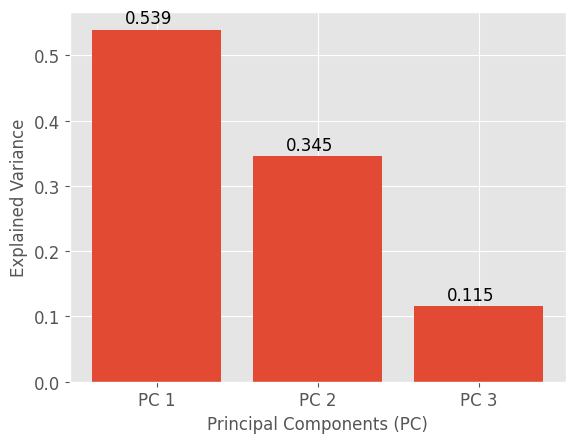

In [559]:

plt.bar(["PC 1", "PC 2", "PC 3"],scenarios_4_pca_all.explained_variance_ratio_)

x = [1,2,3,]

for i in range(len(scenarios_4_pca_all.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = scenarios_4_pca_all.explained_variance_ratio_[i] + 0.01, s = scenarios_4_pca_all.explained_variance_ratio_[i].round(3), size = 12)
    
plt.xlabel("Principal Components (PC)", fontsize=12)
plt.ylabel("Explained Variance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/1559615733.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


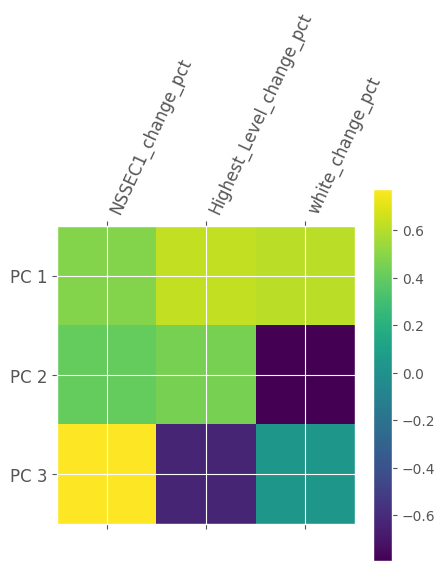

In [560]:

features = ["NSSEC1_change_pct", "Highest_Level_change_pct", "white_change_pct"]

plt.matshow(scenarios_4_pca_all.components_,cmap="viridis")
plt.yticks([0,1,2],["PC 1","PC 2","PC 3",],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha="left",fontsize=12)
plt.grid(True) # Display grid

plt.tight_layout()
plt.show()

## Split data into different year

In [561]:
scenarios_4_for_PCA = scenarios_4[["NSSEC1_change_pct", "Highest_Level_change_pct", "white_change_pct"]].copy()

In [562]:
scenarios_4_for_PCA["scenarios_4_PCA1"] = scenarios_4_PCA_scores[0]
scenarios_4_for_PCA["scenarios_4_PCA2"] = scenarios_4_PCA_scores[1]


In [563]:
path = "data/Output/pca"

In [564]:
scenarios_4_for_PCA.to_csv(path + "/scenrio4_change_pct_pca.csv")

## Analysis

In [565]:
scenarios_4_analyse_PCA = pd.read_csv(path + "/scenrio4_change_pct_pca.csv")

In [566]:
scenarios_4_analyse_PCA.drop(columns = "Unnamed: 0", inplace=True)
scenarios_4_analyse_PCA.head()

,NSSEC1_change_pct,Highest_Level_change_pct,white_change_pct,scenarios_4_PCA1,scenarios_4_PCA2
0,0.231440,0.229387,0.604844,-0.112818,-0.178072
1,0.338578,0.324965,0.591228,-0.009228,-0.080204
2,0.327278,0.234454,0.360470,-0.212145,0.056822
3,0.394507,0.259558,0.293249,-0.204793,0.148854
4,0.318839,0.251497,0.563709,-0.081688,-0.099853


In [567]:
scenarios_4_analyse_PCA["scenarios_4_PCA_total"] = scenarios_4_analyse_PCA["scenarios_4_PCA1"] + scenarios_4_analyse_PCA["scenarios_4_PCA2"]

In [568]:
scenarios_4_analyse_PCA["scenarios_4_PCA_total_zscore"] = zscore(scenarios_4_analyse_PCA["scenarios_4_PCA_total"])

In [569]:
scenarios_4_analyse_PCA["scenarios_4_PCA_total"].max()

1.1475767574607563

In [570]:
print(scenarios_4_analyse_PCA["scenarios_4_PCA1"].quantile(0.75))
print(scenarios_4_analyse_PCA["scenarios_4_PCA1"].quantile(0.25))

0.04231232229922415
-0.06041633398731897


In [572]:
scenarios_4_analyse_PCA["scenarios_4_status"] = "status"

for i in range(len(scenarios_4_analyse_PCA)):
    if  scenarios_4_analyse_PCA["scenarios_4_PCA1"][i] > scenarios_4_analyse_PCA["scenarios_4_PCA1"].quantile(0.75) or  scenarios_4_analyse_PCA["scenarios_4_PCA_total_zscore"][i]> scenarios_4_analyse_PCA["scenarios_4_PCA_total_zscore"].quantile(0.90):
        scenarios_4_analyse_PCA["scenarios_4_status"][i] = "ascent"
    elif scenarios_4_analyse_PCA["scenarios_4_PCA1"][i] < scenarios_4_analyse_PCA["scenarios_4_PCA1"].quantile(0.25) or scenarios_4_analyse_PCA["scenarios_4_PCA_total_zscore"][i]< scenarios_4_analyse_PCA["scenarios_4_PCA_total_zscore"].quantile(0.10):
        scenarios_4_analyse_PCA["scenarios_4_status"][i] = "descent"

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/939991847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenarios_4_analyse_PCA["scenarios_4_status"][i] = "descent"
/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/939991847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenarios_4_analyse_PCA["scenarios_4_status"][i] = "ascent"


In [573]:
scenarios_4_analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,white_change_pct,scenarios_4_PCA1,scenarios_4_PCA2,scenarios_4_PCA_total,scenarios_4_PCA_total_zscore,scenarios_4_status
0,0.231440,0.229387,0.604844,-0.112818,-0.178072,-0.290890,-2.290805,descent
1,0.338578,0.324965,0.591228,-0.009228,-0.080204,-0.089432,-0.704288,status
2,0.327278,0.234454,0.360470,-0.212145,0.056822,-0.155323,-1.223195,descent
3,0.394507,0.259558,0.293249,-0.204793,0.148854,-0.055939,-0.440529,descent
4,0.318839,0.251497,0.563709,-0.081688,-0.099853,-0.181540,-1.429661,descent
...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.658449,0.026166,-0.136342,-0.110176,-0.867651,status
4990,0.365184,0.268310,0.636807,-0.004152,-0.131241,-0.135394,-1.066247,descent
4991,0.385067,0.296868,0.561129,-0.022706,-0.050214,-0.072920,-0.574259,status
4992,0.355600,0.274298,0.496345,-0.090620,-0.021158,-0.111778,-0.880267,descent


In [574]:
scenarios_4_analyse_PCA.groupby(scenarios_4_analyse_PCA["scenarios_4_status"]).size()

scenarios_4_status
ascent     1321
descent    1440
status     2233
dtype: int64

In [575]:
# scenarios_4_status
# ascent     1321
# descent    1440
# status     2233
# dtype: int64

In [576]:
scenarios_4_analyse_PCA["LSOA21CD"] = pca_housing_price["LSOA21CD"] 

In [577]:
scenarios_4_analyse_PCA

,NSSEC1_change_pct,Highest_Level_change_pct,white_change_pct,scenarios_4_PCA1,scenarios_4_PCA2,scenarios_4_PCA_total,scenarios_4_PCA_total_zscore,scenarios_4_status,LSOA21CD
0,0.231440,0.229387,0.604844,-0.112818,-0.178072,-0.290890,-2.290805,descent,E01034473
1,0.338578,0.324965,0.591228,-0.009228,-0.080204,-0.089432,-0.704288,status,E01034474
2,0.327278,0.234454,0.360470,-0.212145,0.056822,-0.155323,-1.223195,descent,E01034471
3,0.394507,0.259558,0.293249,-0.204793,0.148854,-0.055939,-0.440529,descent,E01034472
4,0.318839,0.251497,0.563709,-0.081688,-0.099853,-0.181540,-1.429661,descent,E01034475
...,...,...,...,...,...,...,...,...,...
4989,0.358747,0.300553,0.658449,0.026166,-0.136342,-0.110176,-0.867651,status,E01033742
4990,0.365184,0.268310,0.636807,-0.004152,-0.131241,-0.135394,-1.066247,descent,E01033743
4991,0.385067,0.296868,0.561129,-0.022706,-0.050214,-0.072920,-0.574259,status,E01033744
4992,0.355600,0.274298,0.496345,-0.090620,-0.021158,-0.111778,-0.880267,descent,E01033745


In [578]:
# export all ascent data
scenarios_4_analyse_PCA_ascent = scenarios_4_analyse_PCA[scenarios_4_analyse_PCA["scenarios_4_status"] == "ascent"]

In [579]:
scenarios_4_analyse_PCA.to_csv(path + "/scenrio4_change_pct_pca_tpye_compared_mean.csv")
scenarios_4_analyse_PCA_ascent.to_csv(path + "/scenrio4_change_pct_pca_result_ascent_datacompared_mean.csv")

# Robust Ascending Neighbourhood

In [580]:
scenarios_1_inner_2_ascent = pd.merge(ascent_data, senarios_2_ascent_data, on='LSOA21CD', how='inner')
len(scenarios_1_inner_2_ascent)

1225

In [581]:
add_3_inner_ascent = pd.merge(scenarios_1_inner_2_ascent, scenarios_3_ascent_data, on='LSOA21CD', how='inner')
len(add_3_inner_ascent)

1210

In [582]:
final_result_ascent = pd.merge(add_3_inner_ascent, scenarios_4_analyse_PCA_ascent, on='LSOA21CD', how='inner')
len(final_result_ascent)

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_5640/3055041124.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Highest_Level_change_pct_x', 'white_change_pct_x', 'NSSEC1_change_pct_x'} in the result is deprecated and will raise a MergeError in a future version.
  final_result_ascent = pd.merge(add_3_inner_ascent, scenarios_4_analyse_PCA_ascent, on='LSOA21CD', how='inner')


1206

In [583]:
final_result_ascent.to_csv(path + "/final_result_ascent.csv")